# The IMDB Dataset

---

### Colab Note

Don't forget that you can link your notebook to your drive and save your work there. Then you can download and backup your models, reload them to keep training them, or upload datasets to your drive.

In [ ]:
import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/') # 'My Drive' is the default name of Google Drives
    os.listdir()

# use os.chdir("my-directory") # to change directory, and
# os.listdir()                 # to list its contents
# os.getcwd()                  # to get the name of the current directory
# os.mkdir("my-new-dir")       # to create a new directory
# See: https://realpython.com/working-with-files-in-python/

# You can also use bash commands directly, preceded by a bang
# !ls
# However, the following will *not* change the Python directory
# the notebook points to (use os.chdir for that)!
# !cd my-directory

---

## 1. Theory

Make sure you understand the first video of 3Blue1Brown's introduction to neural nets, and ask questions if there's anything unclear.

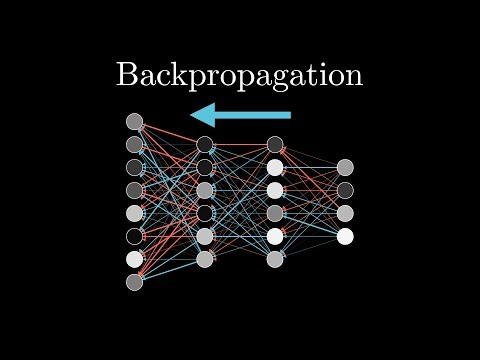

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ilg3gGewQ5U', width=853, height=480) # 3Blue1Brown 3

The fourth video is optional.

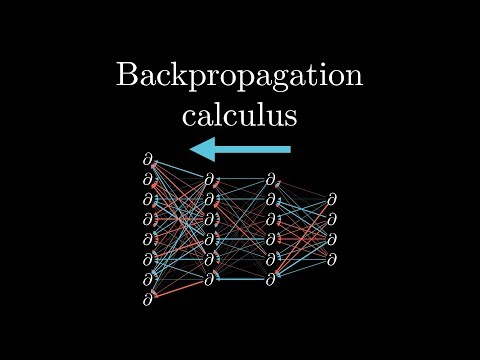

In [ ]:
YouTubeVideo('tIeHLnjs5U8', width=853, height=480) # 3Blue1Brown 4

---

## 2. Practice

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### For reproducible results

```python
tf.random.set_seed(42) # can be any number
```

### Experiments

- Experiment with only one layer, then with more (deeper net);
- Experiment with more or fewer hidden units – 32 units, 64 units etc.
  - One nice challenge is to see how good your results get with a bigger network, then see if you can get to the same level with a smaller one by training longer, or tweaking the learning rate/changing the optimizer;
  - Another is to see how good a result you can get with a fixed number of epochs (e.g. 5);
- Experiment with replacing `relu` with `tanh` activations;
- Try the [`Adam` optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes_2): `optimizers.Adam(learning_rate=0.001)`
- Investigate the effect of different learning rates;
- Investigate the effect of a smaller (or bigger) batch size;
- Train for more epochs, or, conversely, set a number of epochs (say 5), and see how good you can get your model in just these 5 epochs;

**Think about how to record and organise your experiments in a neat way!**

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


# load the IMDB dataset (max review length
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# split training set into train & validation
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_val = x_train[:10000]
y_val = y_train[:10000]

In [ ]:
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Sanity check, how does our network perform before training (use `.evaluate` on `partial_x_train, partial_y_train`). Is the accuracy a value you would expect?

Now we can train.

In [ ]:
# save data from training into the 'history' object
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)

### Visualise your results

Thanks to these plots, it is easier to spot the epoch (epoch number) where our net reached peak performance (lowest *validation loss*/highest *validation accuracy*, prioritising accuracy if the two are not the same).

Think about what would be a good strategy to keep your code as organised as possible as you run many experiments?

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_dict["loss"]

In [ ]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, loss, blue_dots, label="Training loss")
plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
history_dict["accuracy"]

In [ ]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(acc) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, acc, blue_dots, label="Training acc")
plt.plot(epochs, val_acc, solid_blue_line, label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

## 3. Conclusion

Take your best network and train on **all the training data** (`x_train`, `y_train`), without a train/validation split, using the same hyperparameters (optimizer, learning rate, network size, etc.) as your best run, for the optimal number of epochs (looking at your best validation curves).

Evaluate this last model on the test set (`x_test, y_test`).

### Use your model (optional)

Can you import the lecture code used to test the model on a review, and see if you agree with its prediction?

### Save and load models

To save and load models locally, you can use [the high-level API](https://www.tensorflow.org/tutorials/keras/save_and_load):
```python
model.save("my_imdb_model.keras")
```
Later one, to reload it, use:
```python
reloaded_model = tf.keras.models.load_model('my_imdb_model.keras')
```

It is also possible to save not just the model, but also the state of your optimiser, and every variable used during training, using the morer involved [checkpoints](https://www.tensorflow.org/guide/checkpoint#create_the_checkpoint_objects).